<a id='main' name="main"></a>
# Vital Data Analysis

Date: 2022.10.20
Author: © 2022 Zeynalov Hasan 

This notebook is part of an individual project for [M651A1 Artificial Intelligence Methods](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [E. Ceferov](http://mantas.info/).

In this work we answer the questions:

1. [Can we predict the car's prices by using correspond features?](#Q3)

Using the open data from: 
* Cars in Data cars prices data from <https://www.kaggle.com/code/hamadbd/linear-regressions/data?select=CarPrice_Assignment.csv>

This notebook is partially based on:
* Working on features
* Feature scaling,Data Preparation,Data Understanting
* Visualization
* Prediction car prices
* Looking for the Homoscedasticity,Multivariate,Residual Normality,Linearity,Intercept,Coefficient


This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Importing some libraries

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

## Loading the data

In [4]:
import requests
fname = 'CarPrice_Assignment (1).csv'
url = 'https://www.kaggle.com/code/hamadbd/linear-regressions/data?select=CarPrice_Assignment.csv' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)

26971

Load the file to Pandas.

In [218]:
#url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
url = "CarPrice_Assignment (1).csv" 
df = pd.read_csv(url, parse_dates=[3]).fillna(0)

In [219]:
pd.set_option('display.max_columns', None)

In [220]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [221]:
box_df = df.copy()

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

[back to the top](#main)
<a id='Q1' name='Q1'></a>
##  1.Can we predict car prices?

# Data Understanding

In [223]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [224]:
df.shape

(205, 26)

In [225]:
df.duplicated().sum()

0

In [226]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Checking for the missing values

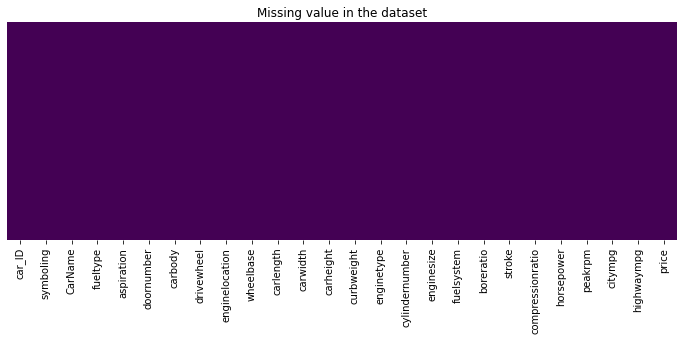

In [227]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

 As we can see,There is no dirty and dublicated values,so the Data Set is clean

# Data Preperation

In [228]:
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [229]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

### We do not need car_ID,CarName,enginelocation, actually,so let's delete it

In [230]:
df.drop(df.iloc[:,0:1],inplace=True,axis=1)

In [231]:
df.drop(df.iloc[:,1:2],inplace=True,axis=1)

In [232]:
df.drop(df.iloc[:,6:7],inplace=True,axis=1)

In [233]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# We have some categorical features in the Data Set,so we need Label and One Hot Encoding

# Encoding

### Label Encoding

In [234]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [235]:
df['fueltype'] = label.fit_transform(df['fueltype'].astype(str))
df['aspiration'] = label.fit_transform(df['aspiration'].astype(str))
df['carbody'] = label.fit_transform(df['carbody'].astype(str))
df['cylindernumber'] = label.fit_transform(df['cylindernumber'].astype(str))

In [236]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,two,2,rwd,94.5,171.2,65.5,52.4,2823,ohcv,3,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,four,3,fwd,99.8,176.6,66.2,54.3,2337,ohc,2,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,four,3,4wd,99.4,176.6,66.4,54.3,2824,ohc,1,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### One Hot Encoding

In [237]:
from sklearn.preprocessing import OneHotEncoder

In [238]:
df['drivewheel'] = df['drivewheel'].astype('category')
df['enginetype'] = df['enginetype'].astype('category')
df['fuelsystem'] = df['fuelsystem'].astype('category')

In [239]:
df['New_drivewheel']=df['drivewheel'].cat.codes
df['New_enginetype']=df['enginetype'].cat.codes
df['New_fuelsystem']=df['fuelsystem'].cat.codes

In [240]:
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(
    df[['New_drivewheel','New_enginetype','New_fuelsystem']]).toarray())


In [241]:
new_df=df.join(enc_data) 
new_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel,New_enginetype,New_fuelsystem,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2,0,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,two,2,rwd,94.5,171.2,65.5,52.4,2823,ohcv,3,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2,5,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,1,0,four,3,fwd,99.8,176.6,66.2,54.3,2337,ohc,2,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,3,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,1,0,four,3,4wd,99.4,176.6,66.4,54.3,2824,ohc,1,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,3,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,four,3,rwd,109.1,188.8,68.9,55.5,2952,ohc,2,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,2,3,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-1,1,1,four,3,rwd,109.1,188.8,68.8,55.5,3049,ohc,2,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,2,3,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-1,1,0,four,3,rwd,109.1,188.8,68.9,55.5,3012,ohcv,3,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,2,5,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-1,0,1,four,3,rwd,109.1,188.8,68.9,55.5,3217,ohc,3,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,2,3,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [242]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['New_drivewheel','New_enginetype','New_fuelsystem'])
one_hot_encoded_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel_0,New_drivewheel_1,New_drivewheel_2,New_enginetype_0,New_enginetype_1,New_enginetype_2,New_enginetype_3,New_enginetype_4,New_enginetype_5,New_enginetype_6,New_fuelsystem_0,New_fuelsystem_1,New_fuelsystem_2,New_fuelsystem_3,New_fuelsystem_4,New_fuelsystem_5,New_fuelsystem_6,New_fuelsystem_7
0,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,two,2,rwd,94.5,171.2,65.5,52.4,2823,ohcv,3,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,1,0,four,3,fwd,99.8,176.6,66.2,54.3,2337,ohc,2,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,1,0,four,3,4wd,99.4,176.6,66.4,54.3,2824,ohc,1,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,four,3,rwd,109.1,188.8,68.9,55.5,2952,ohc,2,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,1,1,four,3,rwd,109.1,188.8,68.8,55.5,3049,ohc,2,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,1,0,four,3,rwd,109.1,188.8,68.9,55.5,3012,ohcv,3,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,-1,0,1,four,3,rwd,109.1,188.8,68.9,55.5,3217,ohc,3,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [243]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel,New_enginetype,New_fuelsystem
0,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0,5
1,3,1,0,two,0,rwd,88.6,168.8,64.1,48.8,2548,dohc,2,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2,0,5
2,1,1,0,two,2,rwd,94.5,171.2,65.5,52.4,2823,ohcv,3,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2,5,5
3,2,1,0,four,3,fwd,99.8,176.6,66.2,54.3,2337,ohc,2,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,3,5
4,2,1,0,four,3,4wd,99.4,176.6,66.4,54.3,2824,ohc,1,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,3,5


In [244]:
df.drop(df.iloc[:,5:6],inplace=True,axis=1)

In [245]:
df.drop(df.iloc[:,10:11],inplace=True,axis=1)

In [246]:
df.drop(df.iloc[:,12:13],inplace=True,axis=1)

In [247]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel,New_enginetype,New_fuelsystem
0,3,1,0,two,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0,5
1,3,1,0,two,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0,2,0,5
2,1,1,0,two,2,94.5,171.2,65.5,52.4,2823,3,152,2.68,3.47,9.0,154,5000,19,26,16500.0,2,5,5
3,2,1,0,four,3,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,3,5
4,2,1,0,four,3,99.4,176.6,66.4,54.3,2824,1,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,3,5


In [248]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [249]:
df.replace({'two':1,'four':2},inplace=True)

In [250]:
df.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel,New_enginetype,New_fuelsystem
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0,5
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0,2,0,5
2,1,1,0,1,2,94.5,171.2,65.5,52.4,2823,3,152,2.68,3.47,9.0,154,5000,19,26,16500.0,2,5,5


In [251]:
#df['Dependents'].replace({'3+':3},inplace=True)

In [252]:
#df['Dependents'].astype('int')

# We have some numerical features and there is too high difference between them,that is why we need Feature Scalling and we have to find the best option

In [253]:
from pandas.plotting import scatter_matrix

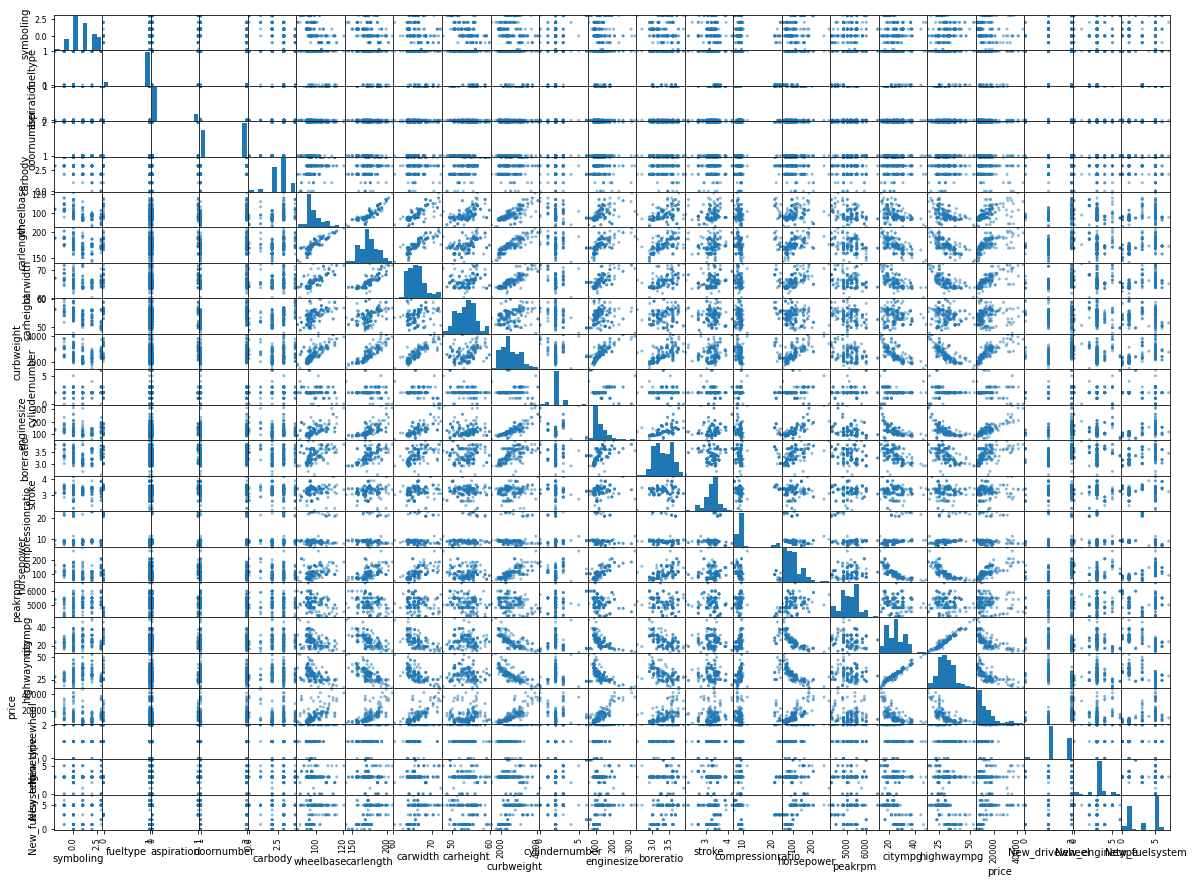

In [254]:
scatter_matrix(df,figsize=(20,15))
plt.show()

In [255]:
box_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [259]:
box_df['price'].value_counts()

8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64

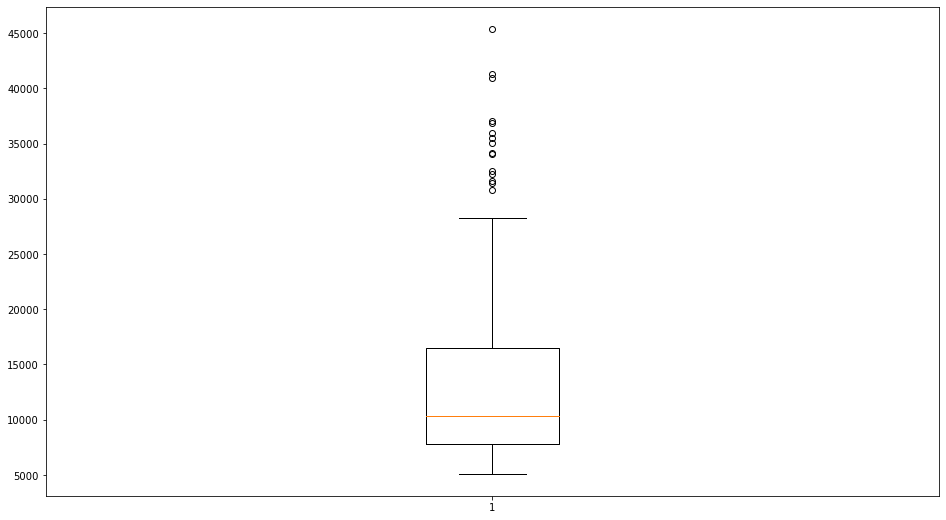

In [260]:
plt.figure(figsize=(16,9))
plt.boxplot(df['price'])
plt.show()

In [271]:
df1 = pd.DataFrame(box_df['price'])

In [273]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit_transform(df1)
min_max = pd.DataFrame(min_max_scaler)
min_max.columns = df1.columns

In [274]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
rs_data = robust_scaler.fit_transform(df1)
rs_df = pd.DataFrame(rs_data)
rs_df.columns = df1.columns

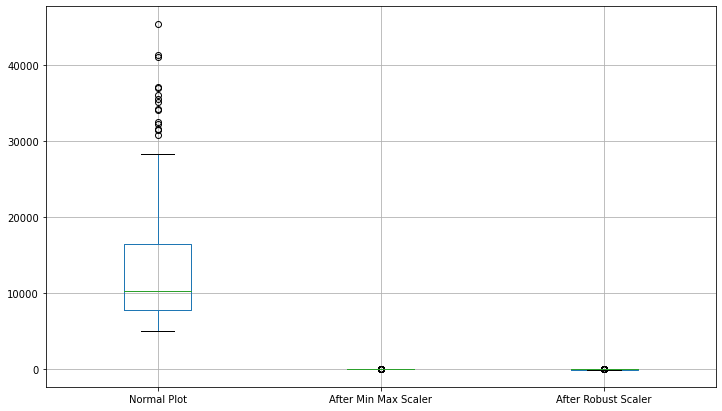

In [275]:
x = pd.DataFrame([df1['price'],min_max['price'],rs_df['price']])
x = x.transpose()
x.columns = ['Normal Plot','After Min Max Scaler','After Robust Scaler']
plt.figure(figsize=(12,7))
x.boxplot()
plt.show()

In [276]:
x

,Normal Plot,After Min Max Scaler,After Robust Scaler
0,13495.0,0.207959,0.367183
1,16500.0,0.282558,0.711991
2,16500.0,0.282558,0.711991
3,13950.0,0.219254,0.419392
4,17450.0,0.306142,0.820998
...,...,...,...
200,16845.0,0.291123,0.751578
201,19045.0,0.345738,1.004016
202,21485.0,0.406311,1.283993
203,22470.0,0.430763,1.397017


In [277]:
df.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel,New_enginetype,New_fuelsystem
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0,5
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0,2,0,5
2,1,1,0,1,2,94.5,171.2,65.5,52.4,2823,3,152,2.68,3.47,9.0,154,5000,19,26,16500.0,2,5,5
3,2,1,0,2,3,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,3,5
4,2,1,0,2,3,99.4,176.6,66.4,54.3,2824,1,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,3,5


In [278]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [279]:
df['wheelbase'] = rs.fit_transform(df[['wheelbase']])

In [280]:
df['carheight'] = rs.fit_transform(df[['carlength']])

In [281]:
df['carlength'] = rs.fit_transform(df[['carlength']])

In [282]:
df['curbweight'] = rs.fit_transform(df[['curbweight']])

In [283]:
df['enginesize'] = rs.fit_transform(df[['enginesize']])

In [284]:
df['citympg'] = rs.fit_transform(df[['citympg']])

In [285]:
df['highwaympg'] = rs.fit_transform(df[['highwaympg']])

In [286]:
df['horsepower'] = rs.fit_transform(df[['horsepower']])

In [287]:
df['peakrpm'] = rs.fit_transform(df[['peakrpm']])

In [288]:
df['carwidth'] = rs.fit_transform(df[['carwidth']])

In [289]:
from sklearn.preprocessing import MinMaxScaler

In [290]:
min_max_scaler = MinMaxScaler()

In [291]:
#df['Loan_Amount_Term'] = min_max_scaler.fit_transform(df[['Loan_Amount_Term']])

In [292]:
#df['Loan_Amount_Term'].value_counts()

In [293]:
#df['CoapplicantIncome'] = min_max_scaler.fit_transform(df[['CoapplicantIncome']])

In [294]:
#df['Loan_Amount_Term'].value_counts()

In [295]:
df

,symboling,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel,New_enginetype,New_fuelsystem
0,3,1,0,1,0,-1.063291,-0.261905,-0.500000,-0.261905,0.169620,2,0.227273,3.47,2.68,9.0,0.347826,-0.285714,-0.272727,-0.333333,13495.0,2,0,5
1,3,1,0,1,0,-1.063291,-0.261905,-0.500000,-0.261905,0.169620,2,0.227273,3.47,2.68,9.0,0.347826,-0.285714,-0.272727,-0.333333,16500.0,2,0,5
2,1,1,0,1,2,-0.316456,-0.119048,0.000000,-0.119048,0.517722,3,0.727273,2.68,3.47,9.0,1.282609,-0.285714,-0.454545,-0.444444,16500.0,2,5,5
3,2,1,0,2,3,0.354430,0.202381,0.250000,0.202381,-0.097468,2,-0.250000,3.19,3.40,10.0,0.152174,0.428571,0.000000,0.000000,13950.0,1,3,5
4,2,1,0,2,3,0.303797,0.202381,0.321429,0.202381,0.518987,1,0.363636,3.19,3.40,8.0,0.434783,0.428571,-0.545455,-0.888889,17450.0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,2,3,1.531646,0.928571,1.214286,0.928571,0.681013,2,0.477273,3.78,3.15,9.5,0.413043,0.285714,-0.090909,-0.222222,16845.0,2,3,5
201,-1,1,1,2,3,1.531646,0.928571,1.178571,0.928571,0.803797,2,0.477273,3.78,3.15,8.7,1.413043,0.142857,-0.454545,-0.555556,19045.0,2,3,5
202,-1,1,0,2,3,1.531646,0.928571,1.214286,0.928571,0.756962,3,1.204545,3.58,2.87,8.8,0.847826,0.428571,-0.545455,-0.777778,21485.0,2,5,5
203,-1,0,1,2,3,1.531646,0.928571,1.214286,0.928571,1.016456,3,0.568182,3.01,3.40,23.0,0.239130,-0.571429,0.181818,-0.333333,22470.0,2,3,3


# Visualization

<Figure size 1008x576 with 0 Axes>

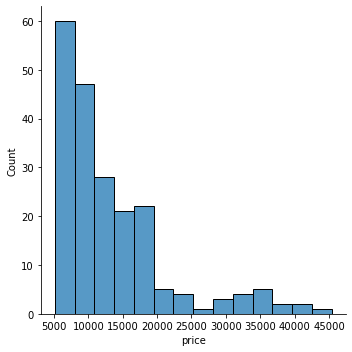

In [296]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.displot(df['price'])
plt.show()

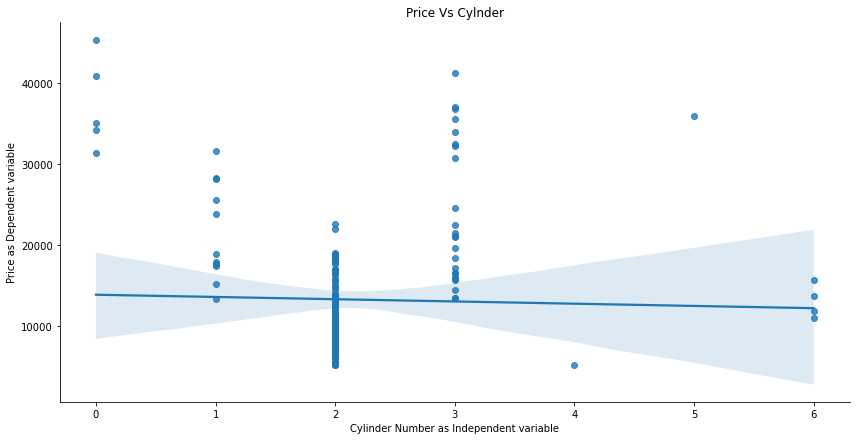

In [297]:
sns.lmplot(x='cylindernumber',y='price',data=df,aspect=2,height=6)
plt.ylabel('Price as Dependent variable')
plt.xlabel('Cylinder Number as Independent variable')
plt.title('Price Vs Cylnder');

In [298]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

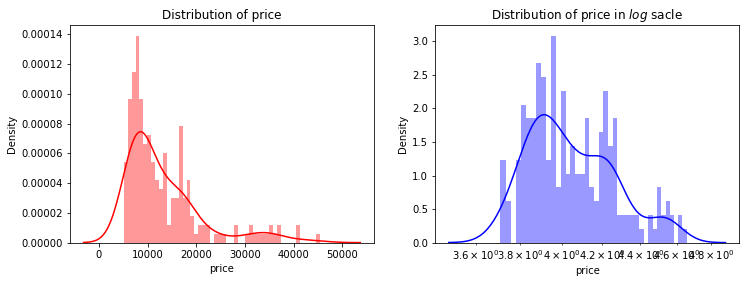

In [299]:
import warnings
warnings.filterwarnings("ignore")

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of price')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['price']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of price in $log$ sacle')
ax.set_xscale('log');


# Model building

# Train Test Splitting

In [300]:
X = df.drop('price',axis=1) # Independet variable
y = df['price'] # dependent variables

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# Fitting

In [303]:
regressor = LinearRegression()

In [304]:
regressor.fit(X_test,y_test)

LinearRegression()

# Prediction

In [305]:
y_pred = regressor.predict(X_test)

In [306]:
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
n = X_test.shape[0]
p = X_test.shape[1]
print("Adjusted R2:",1-(1-R2)*(n-1)/(n-p-1))
print("Mean Absolute Eror:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root mean Squared Eror:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2: 0.949324730814092
Adjusted R2: 0.9207386815297336
Mean Absolute Eror: 1642.4745934280825
Mean Squared Error: 4641245.172351979
Root mean Squared Eror: 2154.354931842007


# Intercept and Coefficient

#### y = β0 + β1x + e

##### B1 - Coefficient
##### B0 - Intercept

In [307]:
print(f"Intercept:{regressor.intercept_}")

Intercept:5781.850668294326


In [308]:
print(f"Coefficient:{regressor.coef_}")

Coefficient:[ -485.44820511 10148.18039646  1159.3041648   1539.87645349
  -815.61689649  -720.59957522  -332.29943854  2892.85254115
  -332.29943854   420.48334457  1581.70232148  7131.11992616
 -2361.79464004 -3750.85495797   811.53427513  1311.61256768
  1949.57581919   507.49843481   452.91039921  1109.49521581
  1121.33905619   200.28046923]


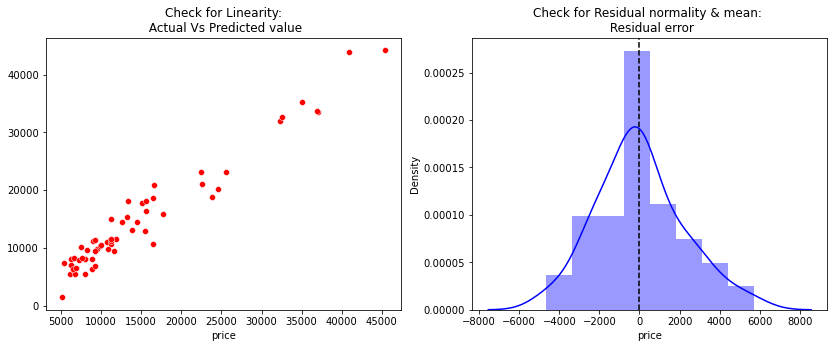

In [309]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error');

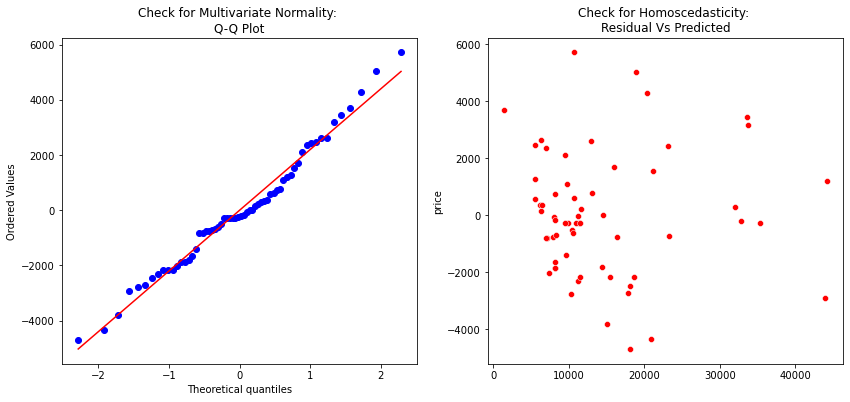

In [310]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');


In [311]:
y_test = y_test.reset_index(drop=True)
res = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

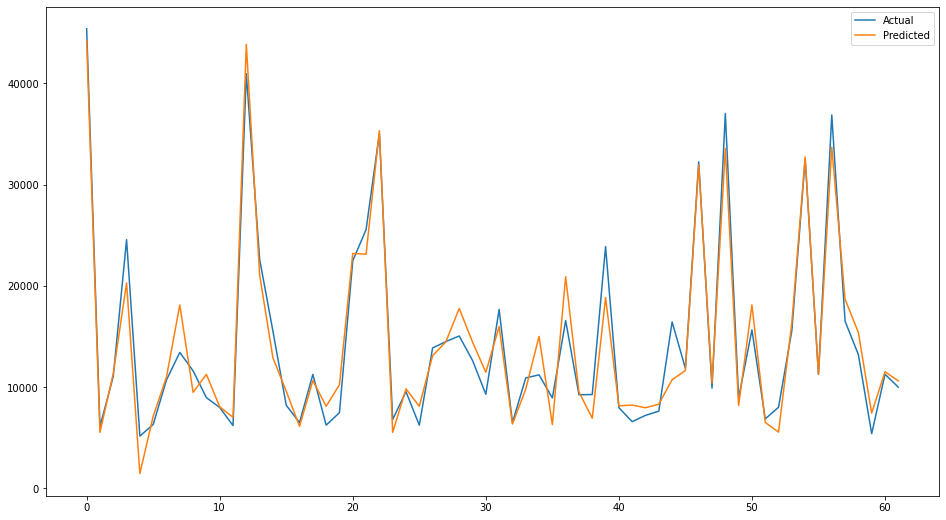

In [312]:
res.plot(figsize=(16,9))
plt.show()

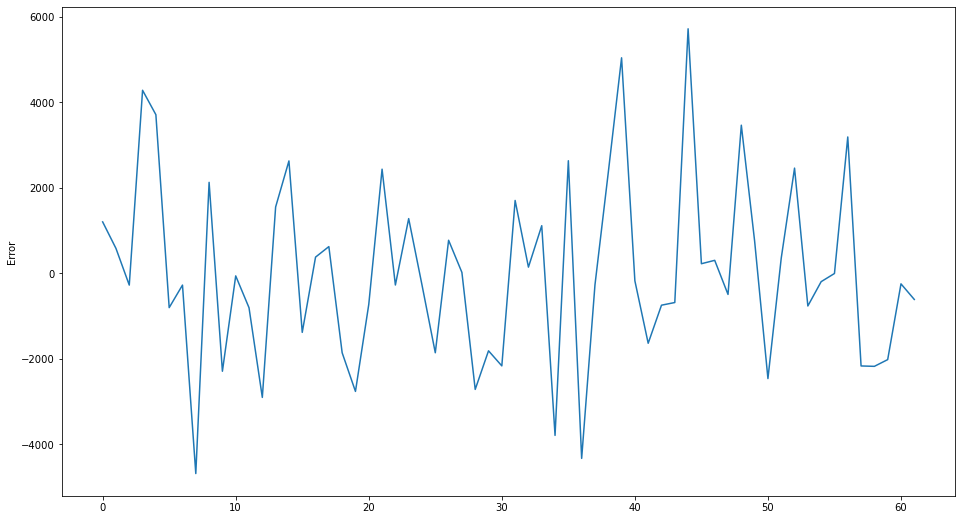

In [313]:
res['Error'] = res['Actual'] - res['Predicted']
res['Error'].plot(figsize=(16,9))
plt.ylabel('Error')
plt.show()

In [314]:
y_test.shape

(62,)

In [315]:
y_pred.shape

(62,)

In [316]:
df.shape

(205, 23)

In [317]:
df

,symboling,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,New_drivewheel,New_enginetype,New_fuelsystem
0,3,1,0,1,0,-1.063291,-0.261905,-0.500000,-0.261905,0.169620,2,0.227273,3.47,2.68,9.0,0.347826,-0.285714,-0.272727,-0.333333,13495.0,2,0,5
1,3,1,0,1,0,-1.063291,-0.261905,-0.500000,-0.261905,0.169620,2,0.227273,3.47,2.68,9.0,0.347826,-0.285714,-0.272727,-0.333333,16500.0,2,0,5
2,1,1,0,1,2,-0.316456,-0.119048,0.000000,-0.119048,0.517722,3,0.727273,2.68,3.47,9.0,1.282609,-0.285714,-0.454545,-0.444444,16500.0,2,5,5
3,2,1,0,2,3,0.354430,0.202381,0.250000,0.202381,-0.097468,2,-0.250000,3.19,3.40,10.0,0.152174,0.428571,0.000000,0.000000,13950.0,1,3,5
4,2,1,0,2,3,0.303797,0.202381,0.321429,0.202381,0.518987,1,0.363636,3.19,3.40,8.0,0.434783,0.428571,-0.545455,-0.888889,17450.0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,2,3,1.531646,0.928571,1.214286,0.928571,0.681013,2,0.477273,3.78,3.15,9.5,0.413043,0.285714,-0.090909,-0.222222,16845.0,2,3,5
201,-1,1,1,2,3,1.531646,0.928571,1.178571,0.928571,0.803797,2,0.477273,3.78,3.15,8.7,1.413043,0.142857,-0.454545,-0.555556,19045.0,2,3,5
202,-1,1,0,2,3,1.531646,0.928571,1.214286,0.928571,0.756962,3,1.204545,3.58,2.87,8.8,0.847826,0.428571,-0.545455,-0.777778,21485.0,2,5,5
203,-1,0,1,2,3,1.531646,0.928571,1.214286,0.928571,1.016456,3,0.568182,3.01,3.40,23.0,0.239130,-0.571429,0.181818,-0.333333,22470.0,2,3,3
